# Classification Tutorial

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report)
from sklearn.preprocessing import LabelEncoder
import time  # Import time to calculate training and testing time
import warnings  # Import warnings module to suppress warnings
warnings.filterwarnings("ignore")

### Preprocessing

In [38]:
Label_encoder = LabelEncoder()

# Load the dataset
data = pd.read_csv('fraudTest.csv')
pd.set_option('display.max_columns', None)

#Convert Gender
gender_conversion = {'F': 0, 'M': 1}
data['gender'] = data['gender'].map(gender_conversion)

data['name'] = data['first'] + " " + data['last']
data['address'] = data['street'] + ", " + data['city'] + ", " + data['state']

#Convert first name
data['name'] = Label_encoder.fit_transform(data['name'])

data['age'] = 2024 - pd.to_numeric(data['dob'].str[:4]) 

#Convert Job
data['job'] = Label_encoder.fit_transform(data['job'])

data['merchant'] = Label_encoder.fit_transform(data['merchant'])

data['category'] = Label_encoder.fit_transform(data['category'])

data['address'] = Label_encoder.fit_transform(data['address'])

data['trans_num'] = Label_encoder.fit_transform(data['trans_num'])

data = data.drop(columns=['first', 'last', 'street', 'street', 'city', 'state', 'trans_date_trans_time', 'Unnamed: 0', 'dob'])



data.head()

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,address,age
0,2291163933867244,319,10,2.86,1,29209,33.9659,-80.9355,333497,275,98699,1371816865,33.986391,-81.200714,0,377,341,56
1,3573030041201292,591,10,29.84,0,84002,40.3207,-110.4360,302,392,108785,1371816873,39.450498,-109.960431,0,428,354,34
2,3598215285024754,611,5,41.28,0,11710,40.6729,-73.5365,34496,259,433979,1371816893,40.495810,-74.196111,0,70,865,54
3,3591919803438423,222,9,60.05,1,32780,28.5697,-80.8191,54767,407,71993,1371816915,28.812398,-80.883061,0,109,320,37
4,3526826139003047,292,13,3.19,1,49632,44.2529,-85.0170,1126,196,190585,1371816917,44.959148,-85.884734,0,678,548,69


In [39]:
X = data.drop('is_fraud', axis = 'columns').values
y = data.is_fraud.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size =0.30, random_state=42)

### Classification (models' training and prediction)

In [40]:
myLogRegModel = Pipeline([
    ('scale', StandardScaler()),
    ('LogReg', LogisticRegression(max_iter=10000)) 
    ])

# Measure training time for Logistic Regression
start_time = time.time()
myLogRegModel.fit(Xtrain, ytrain)
logreg_train_time = time.time() - start_time

# Measure test (prediction) time for Logistic Regression
start_time = time.time()
ytest_pred_logreg = myLogRegModel.predict(Xtest)
logreg_test_time = time.time() - start_time

In [41]:
#Build SVM model

mySVM = Pipeline([
    ('scale', StandardScaler()),
    ('linSVM', LinearSVC(max_iter=10000)) 
    ])

# Measure training time for SVM
start_time = time.time()
mySVM.fit(Xtrain, ytrain)
svm_train_time = time.time() - start_time

# Measure test (prediction) time for SVM
start_time = time.time()
ytest_pred_svm = mySVM.predict(Xtest)
svm_test_time = time.time() - start_time


In [42]:
# K-Nearest Neighbors (KNN) model
myKNN = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Use 5 neighbors by default
])

# Measure training time for KNN
start_time = time.time()
myKNN.fit(Xtrain, ytrain)
knn_train_time = time.time() - start_time

# Measure test (prediction) time for KNN
start_time = time.time()
ytest_pred_knn = myKNN.predict(Xtest)
knn_test_time = time.time() - start_time


In [43]:
print(f"Logistic Regression Training time (seconds): {logreg_train_time:.4f}")
print(f"Logistic Regression Test time (seconds): {logreg_test_time:.4f}")


print(f"SVM Training time (seconds): {svm_train_time:.4f}")
print(f"SVM Test time (seconds): {svm_test_time:.4f}")


print(f"KNN Training time (seconds): {knn_train_time:.4f}")
print(f"KNN Test time (seconds): {knn_test_time:.4f}")

Logistic Regression Training time (seconds): 0.6858
Logistic Regression Test time (seconds): 0.0318
SVM Training time (seconds): 1.5822
SVM Test time (seconds): 0.0377
KNN Training time (seconds): 0.2957
KNN Test time (seconds): 96.9396


### Evalution

--- Logistic Regression ---
Test accuracy: 0.9958432304038005
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[166023     53]
 [   640      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716

Sensitivity (Recall) for Logistic Regression: 0.0
Specificity for Logistic Regression: 0.9996808689997351


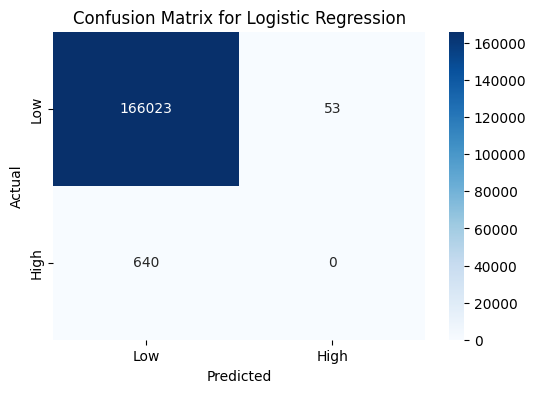

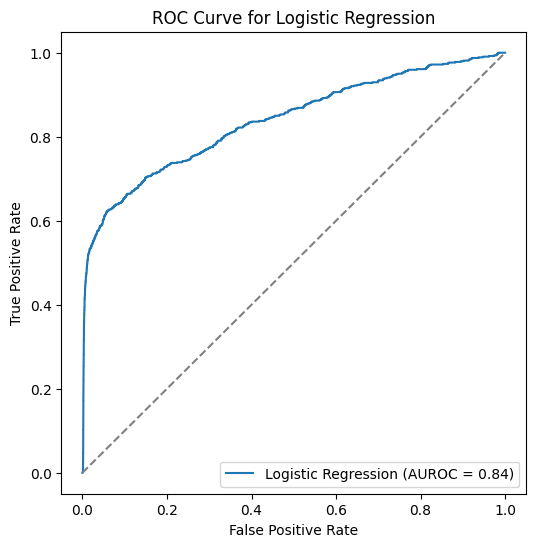

--- SVM ---
Test accuracy: 0.9960831593848221
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[166063     13]
 [   640      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716

Sensitivity (Recall) for SVM: 0.0
Specificity for SVM: 0.9999217225848407


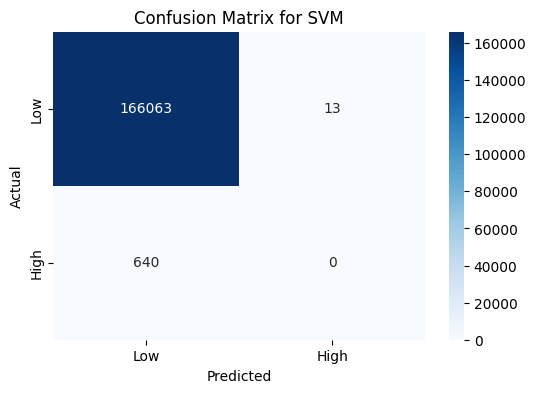

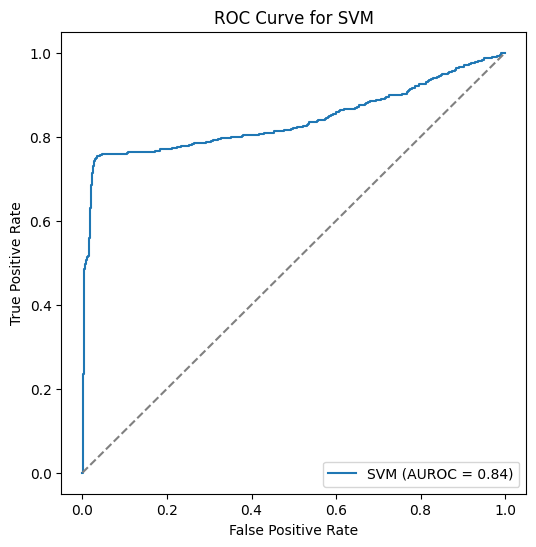

--- KNN ---
Test accuracy: 0.996970896614602
Precision: 0.7385159010600707
Recall: 0.3265625
F1 Score: 0.4528710725893825
Confusion Matrix:
 [[166002     74]
 [   431    209]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.74      0.33      0.45       640

    accuracy                           1.00    166716
   macro avg       0.87      0.66      0.73    166716
weighted avg       1.00      1.00      1.00    166716

Sensitivity (Recall) for KNN: 0.3265625
Specificity for KNN: 0.9995544208675546


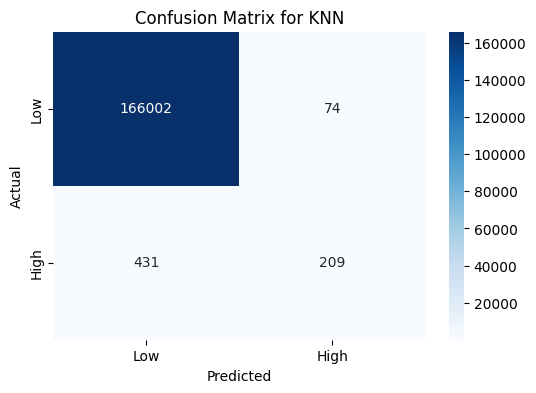

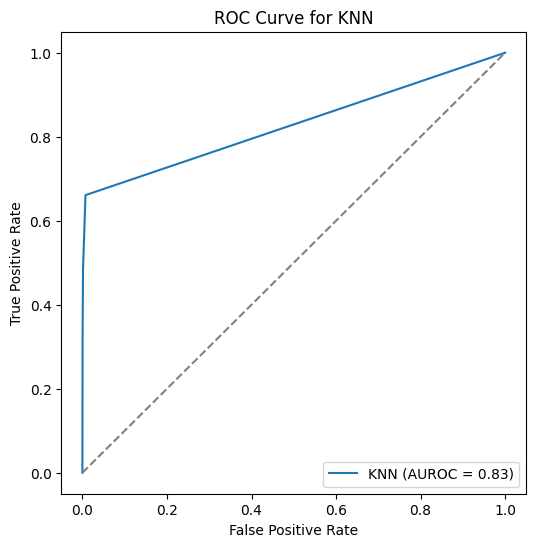

In [44]:
# Prediction and evaluation for all models
models = {'Logistic Regression': myLogRegModel, 
          'SVM': mySVM, 
          'KNN': myKNN}

for model_name, model in models.items():
    ytrain_pred = model.predict(Xtrain)
    ytest_pred = model.predict(Xtest)

    print(f"--- {model_name} ---")
    print("Test accuracy:", accuracy_score(ytest, ytest_pred))
    print("Precision:", precision_score(ytest, ytest_pred))
    print("Recall:", recall_score(ytest, ytest_pred))
    print("F1 Score:", f1_score(ytest, ytest_pred))
    print("Confusion Matrix:\n", confusion_matrix(ytest, ytest_pred))
    print("Classification Report:\n", classification_report(ytest, ytest_pred))
    # Calculate Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(ytest, ytest_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)  # Specificity
    print(f"Sensitivity (Recall) for {model_name}: {sensitivity}")
    print(f"Specificity for {model_name}: {specificity}")

    # Plot confusion matrix heatmap
    cm = confusion_matrix(ytest, ytest_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    
    # ROC Curve and AUC
    ytest_prob = model.predict_proba(Xtest)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(Xtest)
    fpr, tpr, _ = roc_curve(ytest, ytest_prob)
    roc_auc = roc_auc_score(ytest, ytest_prob)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUROC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    
